
#CPE 608: Applied Modeling and Optimization

#Title: Price Optimization To Maximize Sales Profit


Team Members

1. Aayush Gavande CWID: 20010868
2. Shivani Bhawsar CWID: 20013020
3. Chinmay Bhagwat CWID: 20015512

#Importing Library

In [ ]:
!pip install plotly chart-studio
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm
from numpy.linalg import norm
import time
from sympy import *
import sympy
from sklearn.metrics import mean_squared_error
from statsmodels.formula.api import ols
import scipy.optimize as optimize
import plotly 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


#Dataset

Price optimization is using historical data to identify the most appropriate price of a product or a service that maximizes the company’s profitability. There are numerous factors like demography, operating costs, survey data, etc that play a role in efficient pricing, it also depends on the nature of businesses and the product that is served. The business regularly adds/upgrades features to bring more value to the product and this obviously has a cost associated with it in terms of effort, time, and most importantly companies reputation.

As a result, it is important to understand the correct pricing, a little too high, you lose your customers and slight underpricing will result in loss of revenue. Price optimization helps businesses strike the right balance of efficient pricing, achieving profit objectives, and also serve their customers.

For the following project we are using retail sales dataset from https://www.kaggle.com/datasets/suddharshan/retail-price-optimization

In [ ]:
df = pd.read_csv("data.csv" ,  encoding= 'unicode_escape')
df.head(10)

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,OrderID,Product ID,Description,Quantity,Order Date,UnitPrice,CustomerID,Country
0,541518,10002,INFLATABLE POLITICAL GLOBE,12,1/19/2011 9:05,0.85,12451.0,Switzerland
1,541491,10002,INFLATABLE POLITICAL GLOBE,24,1/18/2011 14:04,0.85,12510.0,Spain
2,536370,10002,INFLATABLE POLITICAL GLOBE,48,12/1/2010 8:45,0.85,12583.0,France
3,541631,10002,INFLATABLE POLITICAL GLOBE,12,1/20/2011 10:48,0.85,12637.0,France
4,541277,10002,INFLATABLE POLITICAL GLOBE,1,1/17/2011 11:46,0.85,12673.0,Germany
5,542735,10002,INFLATABLE POLITICAL GLOBE,12,1/31/2011 15:36,0.85,12681.0,France
6,538093,10002,INFLATABLE POLITICAL GLOBE,12,12/9/2010 14:49,0.85,12682.0,France
7,540239,10002,INFLATABLE POLITICAL GLOBE,12,1/5/2011 14:48,0.85,12682.0,France
8,538196,10002,INFLATABLE POLITICAL GLOBE,36,12/10/2010 10:56,0.85,12731.0,France
9,542629,10002,INFLATABLE POLITICAL GLOBE,120,1/31/2011 9:57,0.85,12731.0,France


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   OrderID      541909 non-null  object 
 1   Product ID   541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   Order Date   541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [ ]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [ ]:
df['Product ID'].unique()

array([10002, 10080, 10120, ..., 'PADS', 'POST', 'S'], dtype=object)

##As we see there are many different products in the dataset. We will consider only one product for this project the same steps can be used for other products as well

In [ ]:
data_10002 = df.loc[df['Product ID'] == 10002]
data_10002= data_10002[data_10002['UnitPrice'] != 0.0] #Remove Products with Zero UnitPrice
data_10002.head(10)

,OrderID,Product ID,Description,Quantity,Order Date,UnitPrice,CustomerID,Country
0,541518,10002,INFLATABLE POLITICAL GLOBE,12,1/19/2011 9:05,0.85,12451.0,Switzerland
1,541491,10002,INFLATABLE POLITICAL GLOBE,24,1/18/2011 14:04,0.85,12510.0,Spain
2,536370,10002,INFLATABLE POLITICAL GLOBE,48,12/1/2010 8:45,0.85,12583.0,France
3,541631,10002,INFLATABLE POLITICAL GLOBE,12,1/20/2011 10:48,0.85,12637.0,France
4,541277,10002,INFLATABLE POLITICAL GLOBE,1,1/17/2011 11:46,0.85,12673.0,Germany
5,542735,10002,INFLATABLE POLITICAL GLOBE,12,1/31/2011 15:36,0.85,12681.0,France
6,538093,10002,INFLATABLE POLITICAL GLOBE,12,12/9/2010 14:49,0.85,12682.0,France
7,540239,10002,INFLATABLE POLITICAL GLOBE,12,1/5/2011 14:48,0.85,12682.0,France
8,538196,10002,INFLATABLE POLITICAL GLOBE,36,12/10/2010 10:56,0.85,12731.0,France
9,542629,10002,INFLATABLE POLITICAL GLOBE,120,1/31/2011 9:57,0.85,12731.0,France


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   OrderID      541909 non-null  object 
 1   Product ID   541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   Order Date   541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


#Training the OLS model

**Ordinary Least Squares regression** (OLS) is a common technique for estimating coefficients of linear regression equations which describe the relationship between one or more independent quantitative variables and a dependent variable (simple or multiple linear regression). Least squares stand for the minimum squares error (SSE). Maximum likelihood and Generalized method of moments estimator are alternative approaches to OLS.

By training the ols model we try to find the relation betweeen the UnitPrice and Quantity and make predictions for Quantity based on any given UnitPrice.

In [ ]:
def create_model_and_find_elasticity(data):
  p = data_10002[['UnitPrice']]
  q = data_10002[['Quantity']]
  model = ols("Quantity ~ UnitPrice", data).fit()
  model_reverse = sm.OLS(q,p).fit()
  price_elasticity = model.params[1]
  print("Price elasticity of the product: " + str(price_elasticity))
  print(model.summary())
  fig = plt.figure(figsize=(12,8))
  fig = sm.graphics.plot_partregress_grid(model, fig=fig)
  return price_elasticity, model, model_reverse

Price elasticity of the product: -18.439451422002907
                            OLS Regression Results                            
Dep. Variable:               Quantity   R-squared:                       0.093
Model:                            OLS   Adj. R-squared:                  0.079
Method:                 Least Squares   F-statistic:                     7.040
Date:                Thu, 15 Dec 2022   Prob (F-statistic):            0.00988
Time:                        21:11:38   Log-Likelihood:                -317.18
No. Observations:                  71   AIC:                             638.4
Df Residuals:                      69   BIC:                             642.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------

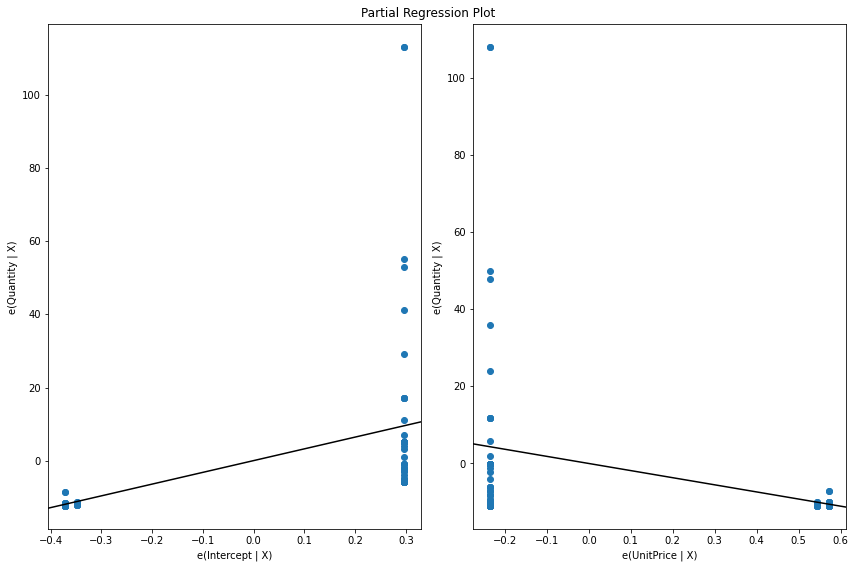

In [ ]:
elasticities = {}
price_elasticity, ols_model_10002, ols_model_10002_reverse, = create_model_and_find_elasticity(data_10002)
elasticities['ols_model_10002'] = price_elasticity
print (price_elasticity)

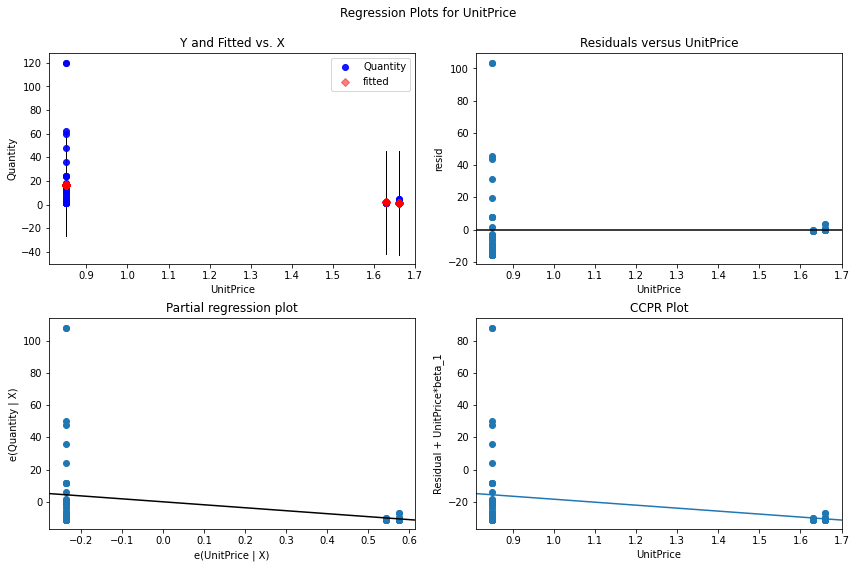

In [ ]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(ols_model_10002, "UnitPrice", fig=fig)

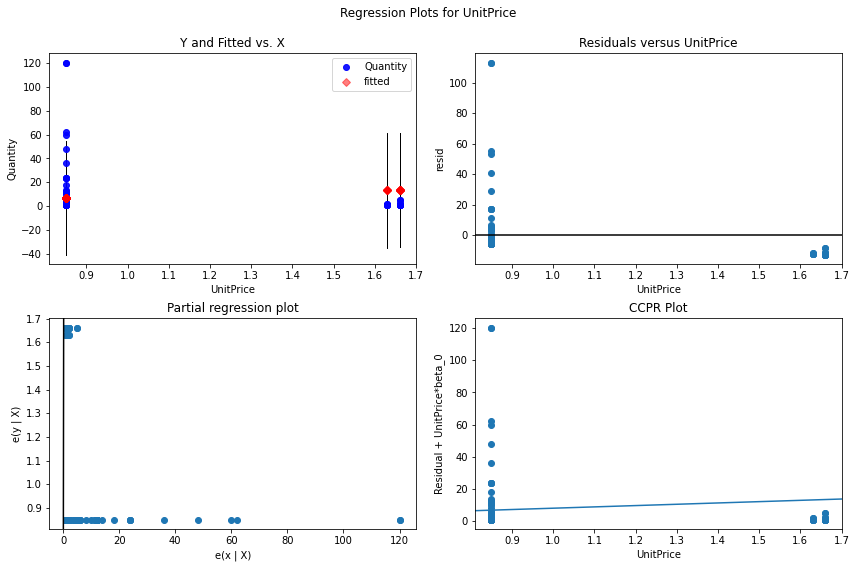

In [ ]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(ols_model_10002_reverse, "UnitPrice", fig=fig)

Now we try to find the range for our price so that we can find the optimal price to achieve maximum profit. 

In [ ]:
data_10002 = data_10002
min_10002 = data_10002.UnitPrice.min()
max_10002 = data_10002.UnitPrice.max()
print (min_10002)
print (max_10002)

0.85
1.66


## Here from the OLS model that we trained we generate a new dataset with UnitPrice and Quantity

In [ ]:
buying_price_10002 = 0.7  # Assuming a base price to calculate profits 
start_price = 0.70
end_price =1.80
test = pd.DataFrame(columns = ["UnitPrice", "Quantity"])
test['UnitPrice'] = np.arange(start_price, end_price,0.01)
test['Quantity'] = ols_model_10002.predict(test['UnitPrice'])
test

,UnitPrice,Quantity
0,0.70,19.241732
1,0.71,19.057337
2,0.72,18.872943
3,0.73,18.688548
4,0.74,18.504154
...,...,...
105,1.75,-0.119692
106,1.76,-0.304087
107,1.77,-0.488481
108,1.78,-0.672876


In [ ]:
test['Profit'] = (test["UnitPrice"] - buying_price_10002) * test["Quantity"]
test

,UnitPrice,Quantity,Profit
0,0.70,19.241732,0.000000
1,0.71,19.057337,0.190573
2,0.72,18.872943,0.377459
3,0.73,18.688548,0.560656
4,0.74,18.504154,0.740166
...,...,...,...
105,1.75,-0.119692,-0.125677
106,1.76,-0.304087,-0.322332
107,1.77,-0.488481,-0.522675
108,1.78,-0.672876,-0.726706


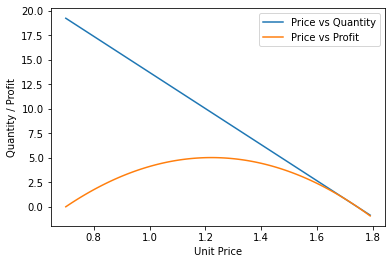

In [ ]:
from scipy.ndimage import label
plt.plot(test['UnitPrice'],test['Quantity'] , label = 'Price vs Quantity')
plt.plot(test['UnitPrice'],test['Profit'], label = 'Price vs Profit')
plt.xlabel("Unit Price")
plt.ylabel("Quantity / Profit")
plt.legend()
plt.show()

In [ ]:
# Read data
import plotly.graph_objects as go
import numpy as np
import chart_studio.plotly as py
from plotly.offline import iplot

z_data = test[['UnitPrice','Quantity','Profit']]

fig = go.Figure(go.Mesh3d(x=(z_data['UnitPrice'].values),
                y=(z_data['Quantity'].values),
                z=(z_data['Profit'].values),
                opacity=0.5,
                color='rgba(244,30,20,0.6)'))
                      
fig.update_layout(title='Price Volume - Profit Curve' , autosize=True)
iplot(fig)

###From the figure above we can see that the Quantity and Price have a downward trend.

###We can also see that there is only one maxima for the Price vs Profit curve which is our optimal solution.

#Optimal Solution:

Our goal is to maximize the profits earned based on which we have to select the best UnitPrice for the product. Looking at Price vs Profit curve above we can clearly see that there is only one maximum which is our optimal solution.

##As we can see that the Price vs Profit curve is a quadratic equation we try to find the coefficients using the polyfit function. 

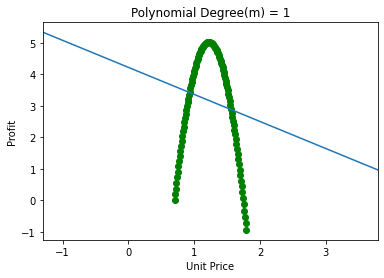

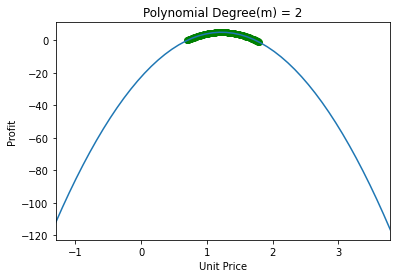

In [ ]:
x = test['UnitPrice']
y = test['Profit']
m=[1,2]
mse=[] # To save Mean Squared Errors for different order m

for i in m:
    coefficients = np.polyfit(x, y, i)
    coefficients # In form of ..... + Ax^2 + Bx + C
    coefficients = coefficients.flatten() #Flatten 2D data to 1D
    polynomial = np.poly1d(coefficients)
    
    polynomial_x = np.linspace(np.min(x)-2, np.max(x)+2)
    polynomial_y = polynomial(polynomial_x)
    predicted_y = polynomial(x)
    plt.xlim([np.min(x)-2, np.max(x)+2 ])
    plt.plot(x, y, 'go--', polynomial_x,polynomial_y)
    plt.xlabel("Unit Price")
    plt.ylabel("Profit")
    plt.title('Polynomial Degree(m) = '+str(i))
    plt.show()
    
    mse_value = mean_squared_error(predicted_y, y);
    mse.append(mse_value)

In [ ]:
print("The coefficient for our function are: ", 'A:', coefficients[0], 'B:', coefficients[1], 'C:', coefficients[2])
print('The function is: ', coefficients[0], "X^2 +", coefficients[1], "X",coefficients[2] )

The coefficient for our function are:  A: -18.43945142200274 B: 45.056963561705274 C: -22.504543296412603
The function is:  -18.43945142200274 X^2 + 45.056963561705274 X -22.504543296412603


#Steepest Descent Algorithm for Optimization.

*   List item
*   List item



Steepest Descent Algorithm is used to minimize or maximize your function and find the optimal solution or saddle point for your function.

In [ ]:
#Steepet Descent Algorithm
def steepestDescent(df, func, xk, threshold = 10 ** (-6)):
    
    f_list = []
    counter = 0
    
    while (True):
        #Hessian Matrix
        hessian_x = hessian(f(x), [x]).subs([(x,xk[0][0])])
        
        #Gradient
        grad = Matrix([f(x)]).jacobian(Matrix([x])).subs([(x,xk[0][0])])
        
        #Alpha Calculation
        num = grad * grad.T;
        den = (grad * hessian_x * grad.T);
        num = np.asarray(num).flatten();
        den = np.asarray(den).flatten();
        num = num[0];
        den = den[0];
        alpha = float(num)/float(den);
        
        #Second order Condition (d.T * H(x) * d >= 0)
        second_order = ((-1 * grad) * hessian_x * (-1 * grad.T))[0]
        
        #xk calculation
        xk = xk - (alpha * grad)
        xk = np.asarray(xk);
        grad = np.asarray(grad);
        grad = grad.astype(float)
    
        #Threshold condition
        check = norm(alpha * grad);
        #Stopping Threshold condition
        if(check <= threshold):
            break;
            
        #Objective Function at updated xk
        fkVal = funcVal(xk);
        f_list.append(fkVal)
        
        #Increment Iteration counter
        counter = counter + 1;
        
        #Round Values
        x1_round = round(xk[0][0],4)
        fkVal_round = round(fkVal,4);
        #second_order_round = round(second_order,3)
        
        #Output Data
        df = df.append({'Iteration': counter, 'alpha': alpha, 'Price': x1_round, 'Profit': fkVal_round, 'Second order': second_order}, ignore_index=True)

    return f_list, df

In [ ]:
x = sympy.symbols('x')
f = sympy.Function('f')
xk = np.array([[0]]); # Initial Value of vector x
t = time.process_time()
df = pd.DataFrame()

#Objective Function
def f(x):
    return -18.43*(x**2) + 45.05*x - 22.50

#Function Value
def funcVal(xk):
    return f(x).subs(x, xk[0][0]);

#Call Steepest Descent Algorithm
f_list, df = steepestDescent(df, f(x), xk);

#Total time to reach solution
total_time = time.process_time() - t

In [ ]:
df.to_csv('Output - Steepest Descent Algorithm.csv', sep='\t')
df

,Iteration,alpha,Price,Profit,Second order
0,1.0,-0.02713,1.2222,5.0299,-74807.4621500000


#Results:

After performing optimization algorithm on our dataset we can conclude that the **UnitPrice should be 1.222** in order to achieve **maximum profit.** 

The same can be verified from the Price vs Profit graph where the maximum profit is achieved at Price 1.22.


**Note:** During the project we have considered only one product from the dataset and optimized the price for that specific product the same method can be followed to optimize for other products as well.